In [42]:
# kaggle kernels output natigmamishov/eda-with-pandas-on-telecom-churn-dataset -p /path/to/dest

# EDA with Pandas on Telecom Churn dataset

* row : a customer

* column : costomer's attributes

* State: string

* Account length: integer

* Area code: integer

* International plan: string

* Voice mail plan: string

* Number vmail messages: integer

* Total day minutes: double

* Total day calls: integer

* Total day charge: double

* Total eve minutes: double

* Total eve calls: integer

* Total eve charge: double

* Total night minutes: double

* Total night calls: integer

* Total night charge: double

* Total intl minutes: double

* Total intl calls: integer

* Total intl charge: double

* Customer service calls: integer

* Churn: string
    * 통신회사 마케팅에서 쓰이는 용어로 단기간 동안 요금 등의 이유로 사업자를 자주 바꾸는 고객.
        미국뿐만 아니라 국내에서도 통신업계의 사업자간의 경쟁에서도 중요한 사안으로 떠오름.

In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 자료를 시각화 하는데 사용하는 대표적인 라이브러리
import seaborn as sns

In [57]:
data = pd.read_csv(r"C:/Users/82109/OneDrive/바탕 화면/churn-bigml-20.csv")

In [40]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [43]:
data.shape

(667, 20)

In [44]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [50]:
data['State'].unique() # unique() : 데이터 고유값 종류 출력

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [47]:
data.nunique() # 데이터 고유값 수 출력

State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64

In [51]:
data['Account length'].value_counts() # 값별로 데이터 수 출력

95     13
127    11
90     10
105    10
64      9
       ..
170     1
232     1
197     1
137     1
184     1
Name: Account length, Length: 179, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [53]:
data["Churn"] = data["Churn"].astype("int64") # 타입 변경

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [55]:
data.describe().T # 데이터 요약

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


In [56]:
data.describe(include=["object"]).T

,count,unique,top,freq
State,667,51,AZ,19
International plan,667,2,No,614
Voice mail plan,667,2,No,478


In [59]:
data["Churn"].value_counts(normalize=True) # normalize=True : 컬럼의 고유값 개수를 센 뒤 총 개수로 나눔

False    0.857571
True     0.142429
Name: Churn, dtype: float64

In [60]:
data.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
203,DE,129,510,No,No,0,334.3,118,56.83,192.1,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
35,TX,208,510,No,No,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True
549,OR,81,415,No,No,0,324.7,48,55.20,236.4,82,20.09,187.6,78,8.44,13.1,5,3.54,0,True
175,SC,87,408,No,No,0,322.5,106,54.83,204.6,93,17.39,186.2,128,8.38,9.4,4,2.54,2,True


In [61]:
data.sort_values(by=["Total day charge", "Total day calls"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
224,WY,53,415,No,Yes,27,25.9,119,4.40,206.5,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False
241,PA,122,415,No,No,0,35.1,62,5.97,180.8,89,15.37,251.6,58,11.32,12.7,2,3.43,1,False
103,NJ,95,415,No,Yes,22,40.9,126,6.95,133.4,90,11.34,264.2,91,11.89,11.9,7,3.21,0,False
594,VA,113,408,No,Yes,34,44.9,63,7.63,134.2,82,11.41,168.4,118,7.58,13.3,3,3.59,1,False
537,DC,80,408,No,No,0,51.5,90,8.76,164.0,98,13.94,169.4,80,7.62,9.5,4,2.57,3,False


In [62]:
data.loc[0:5, "State":"Area code"] # 0에서 5행까지, state부터 area code까지 출력

,State,Account length,Area code
0,LA,117,408
1,IN,65,415
2,NY,161,415
3,SC,111,415
4,HI,49,510
5,AK,36,408


In [63]:
data.iloc[0:5, 0:3] # 정수만 인덱스 받는다

,State,Account length,Area code
0,LA,117,408
1,IN,65,415
2,NY,161,415
3,SC,111,415
4,HI,49,510


In [64]:
data.groupby("Churn")["Total day minutes"].mean()

Churn
False    175.460140
True     213.991579
Name: Total day minutes, dtype: float64

In [66]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

data.groupby(["Churn"])[columns_to_show].agg(['mean', 'std', 'max', 'min']) # 다중집계작업(aggregate)

Total day minutes                         Total eve minutes             \
                   mean        std    max   min              mean        std   
Churn                                                                          
False        175.460140  50.527512  315.6  25.9        199.799650  48.172766   
True         213.991579  70.962188  334.3  62.6        224.764211  53.644848   

                   Total night minutes                          
         max   min                mean        std    max   min  
Churn                                                           
False  361.8  48.1          198.815385  50.406808  367.7  23.2  
True   350.5  88.1          204.923158  45.568206  312.1  72.4

In [67]:
data.apply(np.max)

State                        WY
Account length              232
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         334.3
Total day calls             165
Total day charge          56.83
Total eve minutes         361.8
Total eve calls             168
Total eve charge          30.75
Total night minutes       367.7
Total night calls           175
Total night charge        16.55
Total intl minutes         18.3
Total intl calls             18
Total intl charge          4.94
Customer service calls        8
Churn                      True
dtype: object

What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [68]:
data[(data["Churn"]==0) & (data["International plan"]=="No")]["Total intl minutes"].max()

18.0

In [69]:
pd.crosstab(data["Churn"], data["International plan"]) # crosstab(y축, x축)

International plan,No,Yes
Churn,,
False,538,34
True,76,19


In [73]:
pd.crosstab(data["Churn"], data["International plan"], normalize=True)

International plan,No,Yes
Churn,,
False,0.806597,0.050975
True,0.113943,0.028486


In [74]:
total_calls = (
    data["Total day calls"]
    + data["Total eve calls"]
    + data["Total night calls"]
    + data["Total intl calls"])

data.insert(loc=len(data.columns), column="Total calls", value=total_calls) #변수삽입

In [75]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,271
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,337
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,301
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,316
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,317


In [76]:
d = {"No":0, "Yes":1}

In [77]:
data["International plan"] = data["International plan"].map(d) # 여러 개의 데이터를 한 번에 다른 형태로 변환

In [78]:
data = data.replace({"Voice mail plan":d})

In [79]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,271
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,337
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,301
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,316
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,317


In [80]:
data["Total charge"] = data["Total day charge"] + data["Total eve charge"] + data["Total night charge"] + data["Total intl charge"]

In [81]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,215.8,90,9.71,8.7,4,2.35,1,False,271,73.32
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,...,208.8,111,9.40,12.7,6,3.43,4,True,337,54.20
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,...,160.6,128,7.23,5.4,9,1.46,4,True,301,92.29
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,...,189.6,105,8.53,7.7,6,2.08,2,False,316,41.05
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,...,178.7,90,8.04,11.1,1,3.00,1,False,317,49.60


In [82]:
data.drop(["Total charge", "Total day calls"], axis=1, inplace=True) 
# axis=0은 행 단위 1은 열단위
# inplace True일 경우 메소드가 적용된 데이터 프레임으로 반환

In [83]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,LA,117,408,0,0,0,184.5,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,271
1,IN,65,415,0,0,0,129.1,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,337
2,NY,161,415,0,0,0,332.9,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,301
3,SC,111,415,0,0,0,110.4,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,316
4,HI,49,510,0,0,0,119.3,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,317


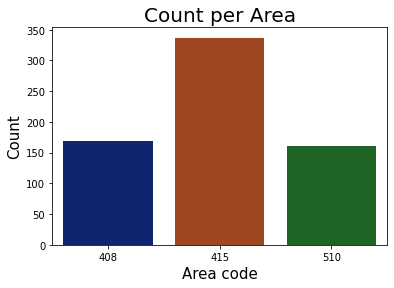

In [87]:
sns.countplot(data["Area code"], palette = "dark")
plt.title("Count per Area", fontsize=20)
plt.xlabel("Area code", fontsize=15)
plt. ylabel('Count', fontsize=15)
plt.show()

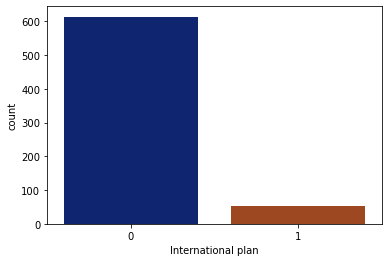

In [89]:
sns.countplot(data["International plan"], palette="dark")
plt.show()

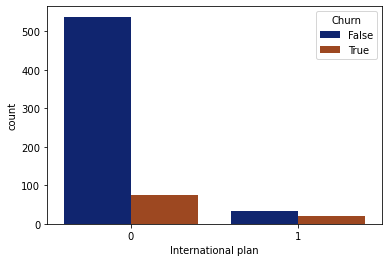

In [91]:
sns.countplot(data["International plan"], hue=data["Churn"], palette="dark")
plt.show()